## Job Scam Detector


**Problem Statement**
- Develop a classification system that can analyze job posting data and determine whether a job listing is legitimate or fraudulent with high precision and recall, helping job seekers avoid scams and focus on genuine opportunities.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('data/data.csv')

NameError: name 'pd' is not defined

In [ ]:
df.sample(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
14326,14327,Apple Repair Technician,"US, CA, San Francisco",NaN,NaN,Started as a business development and consulti...,Create More Inc. is a independantly owned Appl...,3+ years of mac repair experience5+ years of m...,Steady ScheduleSmall BusinessMajor Holidays off,0,1,1,Full-time,Associate,High School or equivalent,Computer Hardware,Customer Service,0
14684,14685,Production Supervisor - Major States,"US, MI, Detroit",NaN,NaN,We Provide Full Time Permanent Positions for m...,Bilingual;Deductive reasoning skills and creat...,"Job Title: Production Supervisor - Chicago, IL...",NaN,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Industrial Automation,Manufacturing,0
3946,3947,Quality Assurance Manager,"GB, LND, Hoxton",Operations,NaN,import•io was founded in 2012 by David White (...,import•io is on the hunt for a Quality Assuran...,You should ideally have:2+ years experience ma...,Your salary will be very competitive and comme...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Quality Assurance,0
14339,14340,Front End Developer,"GB, LND, London",Tech,NaN,10 Minutes With is an educational website desi...,We are seeking a Web Designer (Front End Devel...,Required SkillsProven knowledge and experience...,NaN,0,1,0,Full-time,Associate,Bachelor's Degree,Information Technology and Services,Information Technology,0
12308,12309,Drinking Water/Wastewater Operator,"US, CA, Redd Bluff",NaN,2500-2500,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,Part-time,Associate,NaN,Environmental Services,NaN,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [ ]:
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [ ]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df['location'].str.split(',').str[0]

0        US
1        NZ
2        US
3        US
4        US
         ..
17875    CA
17876    US
17877    US
17878    NG
17879    NZ
Name: location, Length: 17880, dtype: object

In [ ]:
df['Country'] = df['location'].str.split(',').str[0]

In [ ]:
df['Country'].unique()

array(['US', 'NZ', 'DE', 'GB', 'AU', 'SG', 'IL', 'AE', 'CA', 'IN', 'EG',
       'PL', 'GR', nan, 'PK', 'BE', 'BR', 'SA', 'DK', 'RU', 'ZA', 'CY',
       'HK', 'TR', 'IE', 'LT', 'JP', 'NL', 'AT', 'KR', 'FR', 'EE', 'TH',
       'PA', 'KE', 'MU', 'MX', 'RO', 'MY', 'FI', 'CN', 'ES', 'SE', 'CL',
       'UA', 'QA', 'IT', 'LV', 'IQ', 'BG', 'PH', 'CZ', 'VI', 'MT', 'HU',
       'BD', 'KW', 'LU', 'NG', 'RS', 'BY', 'VN', 'ID', 'ZM', 'NO', 'BH',
       'UG', 'CH', 'TT', 'SD', 'SK', 'AR', 'TW', 'PT', 'PE', 'CO', 'IS',
       'SI', 'MA', 'AM', 'TN', 'GH', 'AL', 'HR', 'CM', 'SV', 'NI', 'LK',
       'JM', 'KZ', 'KH'], dtype=object)

In [ ]:
df['State'] = df['location'].str.split(',').str[1]

In [ ]:
df['City'] = df['location'].str.split(',').str[2]

In [ ]:
df.drop(columns=['location'], inplace=True)

In [ ]:
df.sample()

,job_id,title,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,Country,State,City
17225,17226,Graphic designer,NaN,NaN,We provide a fresh perspective to HR and caree...,"&Eta; qmetric, &gamma;&iota;&alpha; &lambda;&o...",NaN,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,GR,B,Thessaloniki


# Handle the Missing Values

In [ ]:
df['salary_range'].unique()

array([nan, '20000-28000', '100000-120000', '120000-150000',
       '50000-65000', '40000-50000', '60-80', '65000-70000', '75-115',
       '75000-110000', '17000-20000', '16000-28000', '95000-115000',
       '15000-18000', '50000-70000', '45000-60000', '30000-40000',
       '70000-90000', '10000-14000', '50-110', '28000-45000', '0-34300',
       '35000-40000', '9-Dec', '44000-57000', '18500-28000',
       '55000-75000', '30000-35000', '0-0', '20000-40000',
       '360000-600000', '50000-80000', '80000-100000', '52000-78000',
       '15750-15750', '40000-65000', '45000-50000', '30000-37000',
       '45000-67000', '35000-100000', '180000-216000', '45000-65000',
       '28000-32000', '0-1000', '36000-40000', '80000-110000',
       '35000-73000', '19000-19000', '60000-120000', '120000-15000000',
       '42000-55000', '90000-120000', '100000-150000', '28000-38000',
       '1600-1700', '50000-60000', '30000-70000', '32000-40000', '50-100',
       '9000-17000', '23040-28800', '105-110', '1300

In [ ]:
def extract_salary_range(salary):
    
    if isinstance(salary, str) and '-' in salary:
        
        salary_range = salary.split('-')
        
        try:
            low_salary = int(salary_range[0])
            high_salary = int(salary_range[1])

            return (low_salary+high_salary)/2

        except ValueError:
            return np.nan
    return np.nan


df['salary_range'] = df['salary_range'].apply(extract_salary_range)

In [ ]:
df['company_profile'].fillna('No company profile', inplace=True)

In [ ]:
df['company_profile'].isna().sum()

np.int64(0)

In [ ]:
df['department'].fillna('No department', inplace=True)

In [ ]:
df['description'].fillna('No description', inplace=True)

In [ ]:
df['requirements'].fillna('No requirements', inplace=True)

In [ ]:
df['benefits'].isna().sum()
df['benefits'].fillna('No benefits', inplace=True)

In [ ]:
df.sample(1)

,job_id,title,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,Country,State,City
17124,17125,Business Analyst - Decision Sciences,No department,NaN,"Nubank is an early stage, technology-driven fi...",Why do we hire Business Analysts? Nubank has s...,You will fit well ifYou are ambitious and razo...,"Competitive compensation packageHealth, dental...",0,1,0,Full-time,NaN,NaN,Financial Services,NaN,0,BR,SP,São Paulo


In [ ]:
df['employment_type'].isna().sum()

np.int64(3471)

In [ ]:
df['employment_type'][df['employment_type'].isna()] = df['employment_type'].dropna().sample(df['employment_type'].isna().sum()).values

In [ ]:
print(df['required_experience'].isna().sum())
df['required_experience'].unique()
df['required_experience'].fillna('No experience', inplace=True)
print(df['required_experience'].isna().sum())

7050
0


In [ ]:
df['required_education'].isna().sum()

np.int64(8105)

In [ ]:
df['required_education'].fillna('No education', inplace=True)

In [ ]:
df['industry'].isna().sum()

np.int64(4903)

In [ ]:
df['industry'][df['industry'].isna()] = df['industry'].dropna().sample(df['industry'].isna().sum()).values

In [ ]:
df['function'].isna().sum()

np.int64(6455)

In [ ]:
df['function'].unique()
df['function'].fillna('No function', inplace=True)

In [ ]:
df.loc[(df['Country'] == 'US') & (df['State'].isna()), 'State'] = df.loc[(df['Country'] == 'US') & (df['State'].notna()), 'State'].sample(df.loc[(df['Country'] == 'US') & (df['State'].isna())].shape[0]).values

In [ ]:
df['Country'].fillna('Missing', inplace=True)
df['State'].fillna('Missing', inplace=True)
df['City'].fillna('Missing', inplace=True)

In [ ]:
df.drop(columns=['salary_range'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   department           17880 non-null  object
 3   company_profile      17880 non-null  object
 4   description          17880 non-null  object
 5   requirements         17880 non-null  object
 6   benefits             17880 non-null  object
 7   telecommuting        17880 non-null  int64 
 8   has_company_logo     17880 non-null  int64 
 9   has_questions        17880 non-null  int64 
 10  employment_type      17880 non-null  object
 11  required_experience  17880 non-null  object
 12  required_education   17880 non-null  object
 13  industry             17880 non-null  object
 14  function             17880 non-null  object
 15  fraudulent           17880 non-null  int64 
 16  Coun

In [ ]:
df.isna().sum()

job_id                 0
title                  0
department             0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
Country                0
State                  0
City                   0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
categorical = []
numerical = []

for col in df.columns:
    if df[col].dtype != 'object':
        numerical.append(col)
    else:
        categorical.append(col)

In [ ]:
print(len(categorical))
print(categorical)

14
['title', 'department', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function', 'Country', 'State', 'City']


In [ ]:
print(len(numerical))
print(numerical)

5
['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']


In [ ]:
df[numerical][df[numerical] == '?'].count()

job_id              0
telecommuting       0
has_company_logo    0
has_questions       0
fraudulent          0
dtype: int64

In [ ]:
df[categorical][df[categorical] == '?'].count()

title                  0
department             0
company_profile        0
description            0
requirements           0
benefits               0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
Country                0
State                  0
City                   0
dtype: int64

<Axes: >

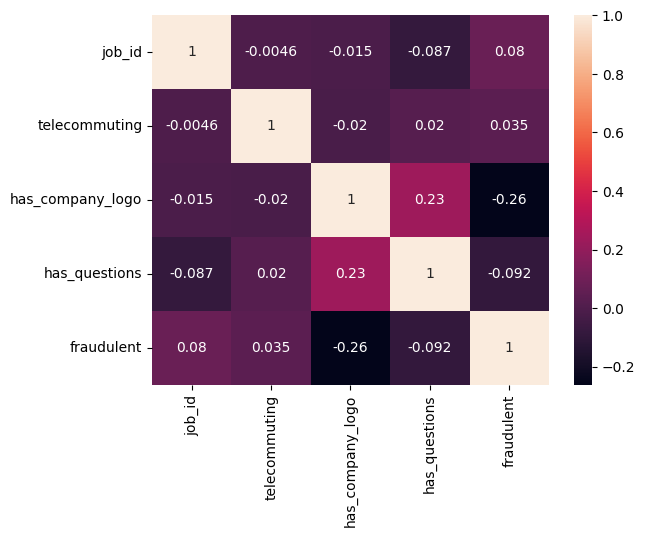

In [ ]:
sns.heatmap(df[numerical].corr(), annot=True)

In [ ]:
df[categorical].nunique()

title                  11231
department              1338
company_profile         1710
description            14802
requirements           11967
benefits                6205
employment_type            5
required_experience        8
required_education        14
industry                 131
function                  38
Country                   91
State                    326
City                    2336
dtype: int64

<Axes: xlabel='count', ylabel='employment_type'>

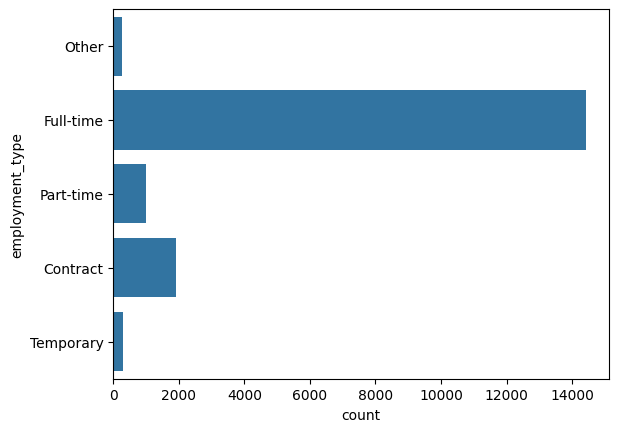

In [ ]:
sns.countplot(df['employment_type'])

<Axes: xlabel='count', ylabel='required_experience'>

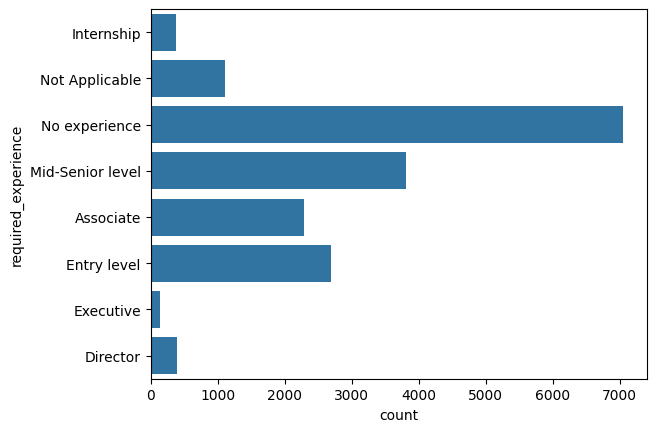

In [ ]:
sns.countplot(df['required_experience'])

<Axes: xlabel='count', ylabel='required_education'>

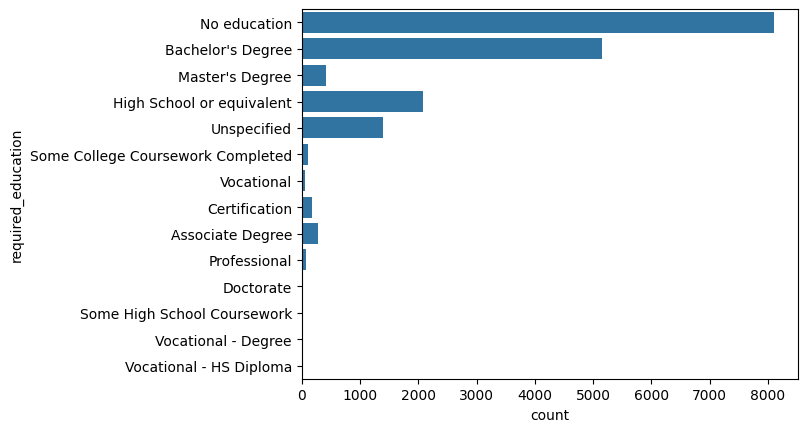

In [ ]:
sns.countplot(df['required_education'])

<Axes: xlabel='required_experience', ylabel='employment_type'>

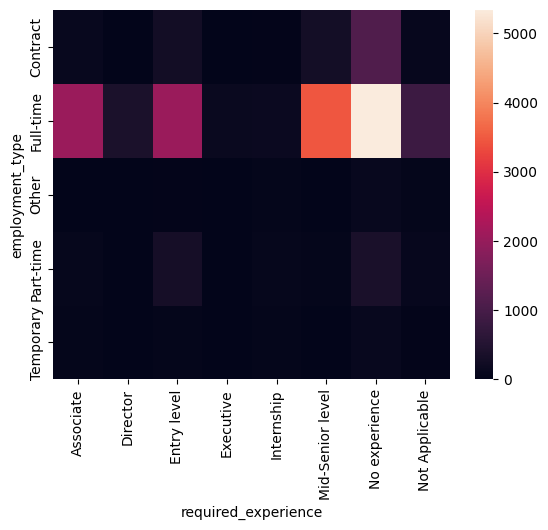

In [ ]:
sns.heatmap(pd.crosstab(df['employment_type'], df['required_experience']))

<Axes: xlabel='required_education', ylabel='employment_type'>

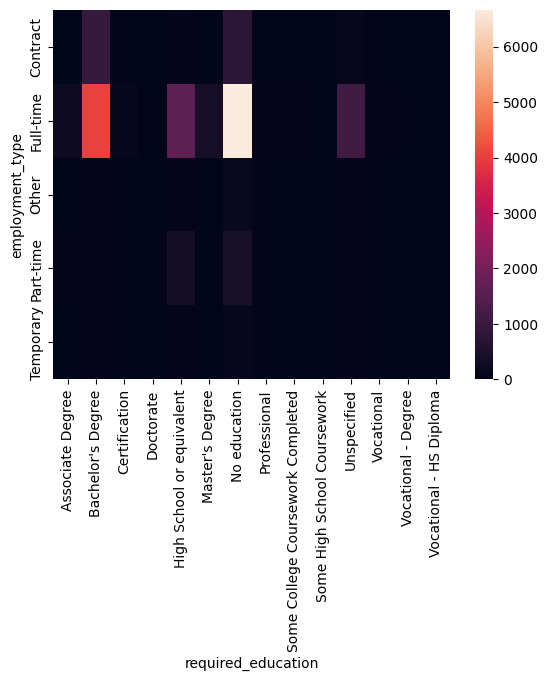

In [ ]:
sns.heatmap(pd.crosstab(df['employment_type'], df['required_education']))

<Axes: xlabel='fraudulent', ylabel='count'>

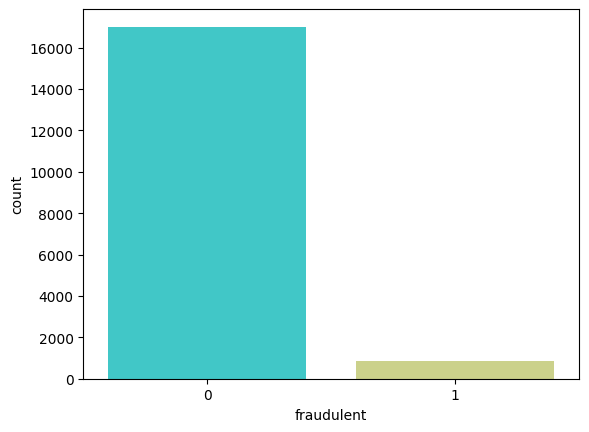

In [ ]:
sns.countplot(data=df, x='fraudulent', palette='rainbow')

In [ ]:
numerical.pop(0)

'job_id'

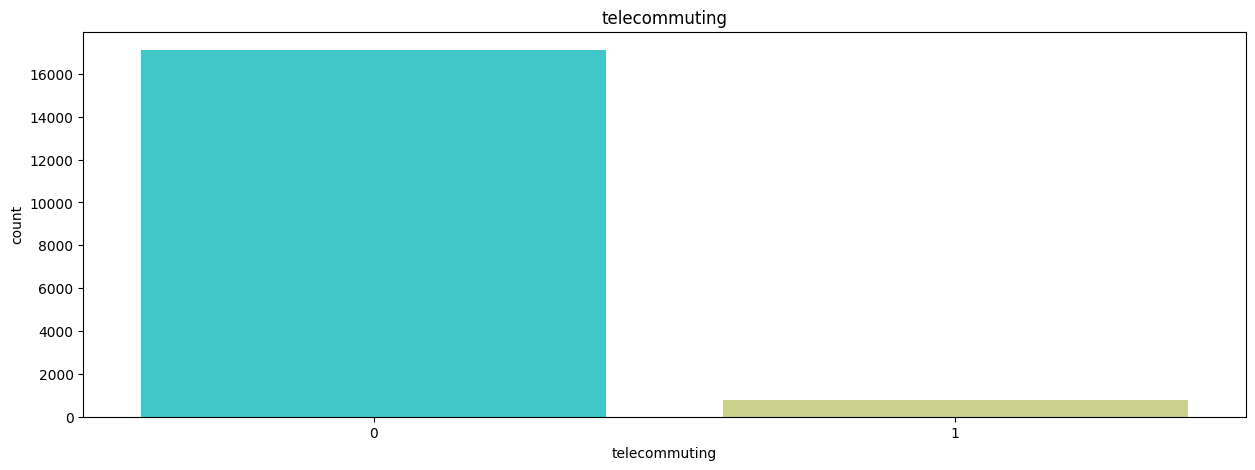

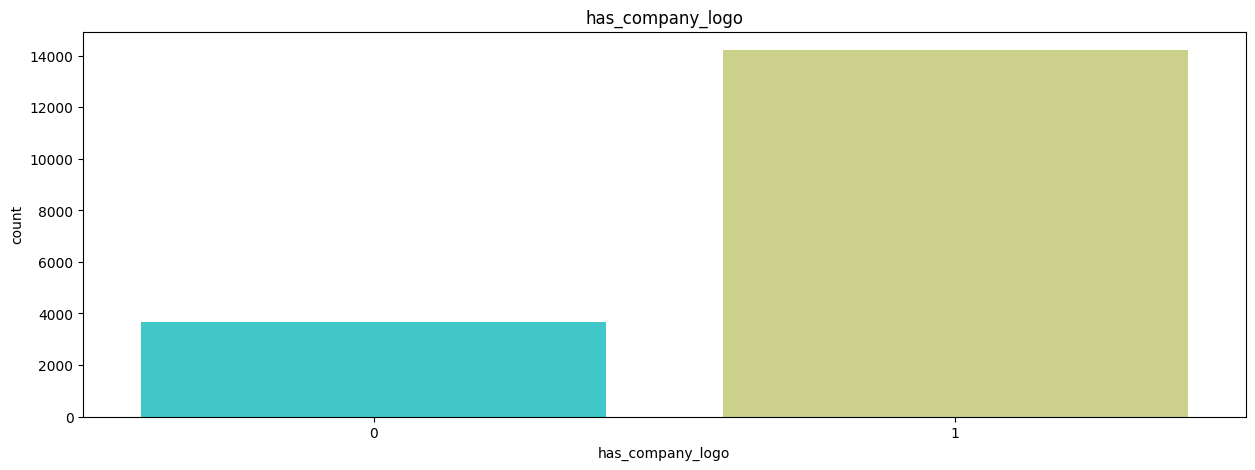

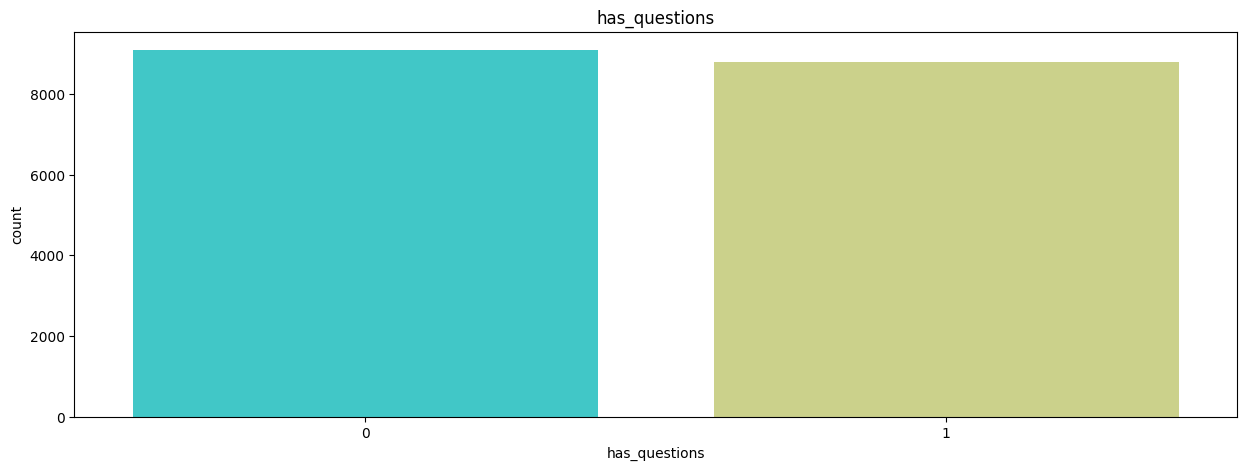

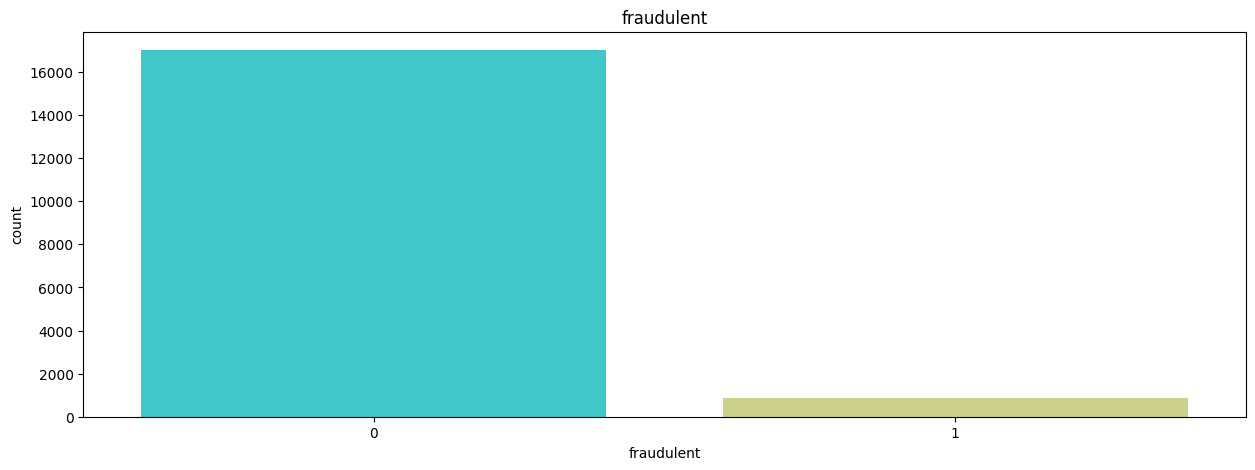

In [ ]:
for i in numerical:
    plt.figure(figsize=(15, 5))
    sns.countplot(data=df, x=i, palette='rainbow')
    plt.title(i)
    plt.show()

Text(0.5, 1.0, 'has_company_logo')

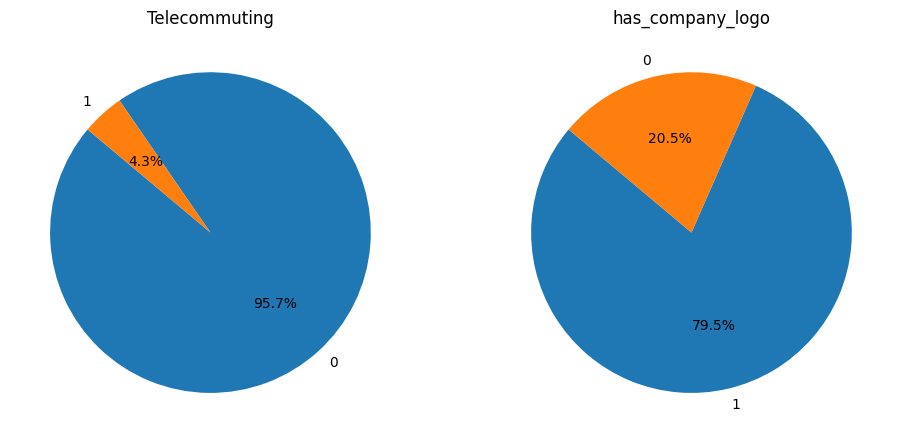

In [ ]:
plt.figure(figsize=(30,12))

plt.subplot(151)
plt.pie(df['telecommuting'].value_counts(), labels=df['telecommuting'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Telecommuting')


plt.subplot(152)
plt.pie(df['has_company_logo'].value_counts(), labels=df['has_company_logo'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('has_company_logo')


In [ ]:
df.sample(5)
df['department'].value_counts()

department
No department                   11547
Sales                             551
Engineering                       487
Marketing                         401
Operations                        270
                                ...  
QA & Programme Delivery             1
Private Duty                        1
RHB OUTSOURCING                     1
reception                           1
IT Administrator / Developer        1
Name: count, Length: 1338, dtype: int64